In [1]:
import csv

data = list(csv.reader(open('guns.csv', 'r')))
headers = data[0]
data = data[1:]

print(headers)
print(data[0:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [2]:
def extract_counts(data, key_extract_function_for_row):
    counts = {}
    for row in data:
        key = key_extract_function_for_row(row)
        counts[key] = counts.get(key, 0) + 1
    return counts

In [3]:
from collections import Counter

year_counts = extract_counts(data, lambda row: int(row[1]))

print(year_counts)

{2012: 33563, 2013: 33636, 2014: 33599}


<Container object of 3 artists>

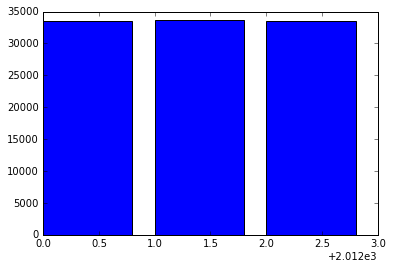

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(year_counts.keys(), year_counts.values())

In [5]:
import datetime

date_counts = extract_counts(data, 
                             lambda row: datetime.datetime(year=int(row[1]), 
                                                           month=int(row[2]), 
                                                           day = 1))
print(date_counts)


{datetime.datetime(2013, 8, 1, 0, 0): 2859, datetime.datetime(2014, 3, 1, 0, 0): 2684, datetime.datetime(2013, 4, 1, 0, 0): 2798, datetime.datetime(2014, 10, 1, 0, 0): 2865, datetime.datetime(2013, 10, 1, 0, 0): 2808, datetime.datetime(2013, 3, 1, 0, 0): 2862, datetime.datetime(2014, 12, 1, 0, 0): 2857, datetime.datetime(2014, 2, 1, 0, 0): 2361, datetime.datetime(2013, 9, 1, 0, 0): 2742, datetime.datetime(2013, 6, 1, 0, 0): 2920, datetime.datetime(2012, 3, 1, 0, 0): 2743, datetime.datetime(2013, 5, 1, 0, 0): 2806, datetime.datetime(2012, 12, 1, 0, 0): 2791, datetime.datetime(2014, 5, 1, 0, 0): 2864, datetime.datetime(2012, 2, 1, 0, 0): 2357, datetime.datetime(2014, 7, 1, 0, 0): 2884, datetime.datetime(2013, 11, 1, 0, 0): 2758, datetime.datetime(2014, 4, 1, 0, 0): 2862, datetime.datetime(2013, 7, 1, 0, 0): 3079, datetime.datetime(2012, 1, 1, 0, 0): 2758, datetime.datetime(2013, 12, 1, 0, 0): 2765, datetime.datetime(2012, 11, 1, 0, 0): 2729, datetime.datetime(2012, 7, 1, 0, 0): 3026, dat

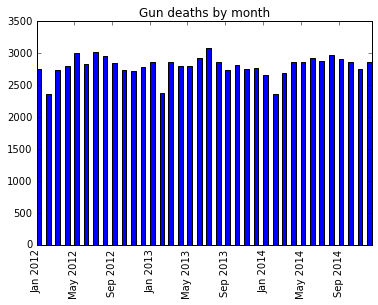

In [6]:
ax = plt.subplot(111)
ax.bar(list(date_counts.keys()), list(date_counts.values()), width = 15)
ax.xaxis_date()
plt.title("Gun deaths by month")
plt.xticks(rotation='vertical')
plt.show()

In [7]:
def plot_counts(counts, count_type):
    value_range = range(0, len(counts))
    
    ax = plt.subplot(111)    
    ax.bar(value_range, list(counts.values()))
    plt.title("Gun deaths by " + count_type)
    plt.xticks(value_range, counts.keys(), rotation = 'vertical')
    plt.show()

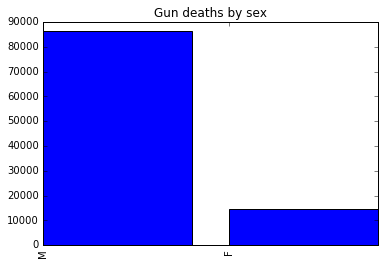

In [8]:
sex_counts = extract_counts(data, lambda row: row[5])
plot_counts(sex_counts, "sex")

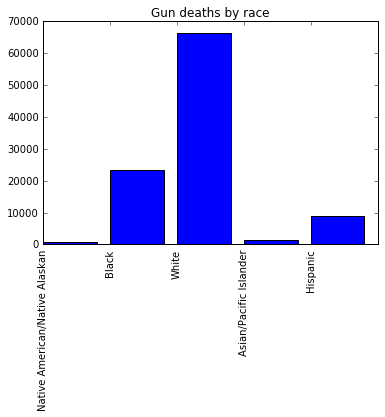

In [9]:
race_counts = extract_counts(data, lambda row: row[7])
plot_counts(race_counts, "race")

# Observations

## Date of death

There is no significan difference between years 2012, 2013 and 2014.

There is correlation between months within year. Lowers death counts is in february for each year. Highest deat count is in summer.

## Gender

Much more men have died by gun than women.

## Race 

Mostly white people died by gun. However distribution by race is not considered.

In [10]:
census = list(csv.reader(open("census.csv", 'r')))
for index, column in enumerate(census[0]):
    print("{} - {}: {}".format(index, column, census[1][index]))


0 - Id: cen42010
1 - Year: April 1, 2010 Census
2 - Id: totsex
3 - Sex: Both Sexes
4 - Id: tothisp
5 - Hispanic Origin: Total
6 - Id: 0100000US
7 - Id2: 
8 - Geography: United States
9 - Total: 308745538
10 - Race Alone - White: 197318956
11 - Race Alone - Hispanic: 44618105
12 - Race Alone - Black or African American: 40250635
13 - Race Alone - American Indian and Alaska Native: 3739506
14 - Race Alone - Asian: 15159516
15 - Race Alone - Native Hawaiian and Other Pacific Islander: 674625
16 - Two or More Races: 6984195


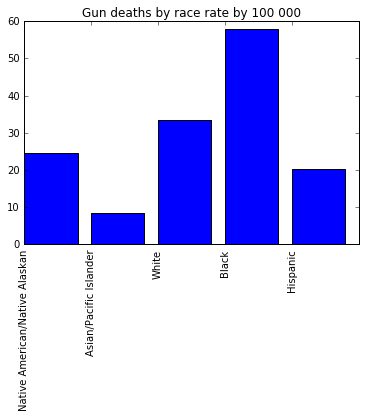

In [11]:
def get_race_count(census, column_indexes):
    return sum([int(census[1][index]) for index in column_indexes])

race_percentage = {
    "Black": get_race_count(census, [12]),
    "Asian/Pacific Islander": get_race_count(census, [14, 15]),
    "White": get_race_count(census, [10]),
    "Hispanic": get_race_count(census, [11]),
    "Native American/Native Alaskan": get_race_count(census, [13])
}

race_rate_by_100k = {}
for key in race_counts:
    race_rate_by_100k[key] = float(race_counts[key]) / race_percentage[key] * 100000
    
plot_counts(race_rate_by_100k, "race rate by 100 000")

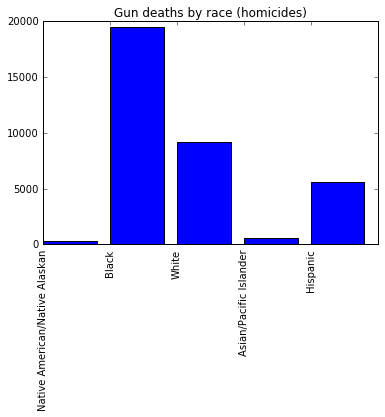

In [12]:
homicide_by_race_counts = extract_counts([row for row in data if row[3] == 'Homicide'],
                                        lambda row: row[7])
plot_counts(homicide_by_race_counts, "race (homicides)")

In [13]:
set([row[3] for row in data])

{'Accidental', 'Homicide', 'NA', 'Suicide', 'Undetermined'}

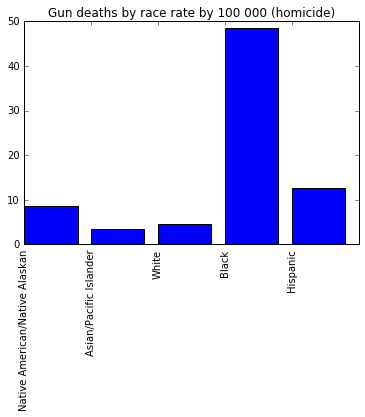

In [14]:
homicide_by_race_rate_by_100k = {}
for key in homicide_by_race_counts:
    homicide_by_race_rate_by_100k[key] = float(homicide_by_race_counts[key]) / race_percentage[key] * 100000
    
plot_counts(homicide_by_race_rate_by_100k, "race rate by 100 000 (homicide)")

# Death by race

We have learned that black people are much more likely to get killed by gun than people of other races.

For deth rate by race, it could be interesting to evaluate other kinds of death types by race.

## Other steps

There are many things to explore in this data set. It is (sadly) interesting set because of recent development in United States.

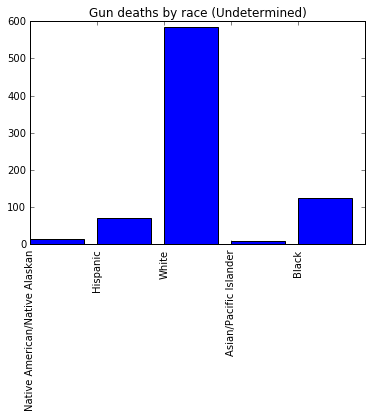

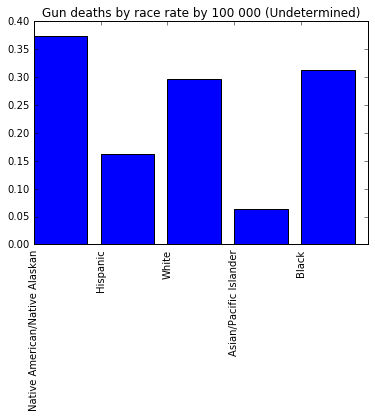

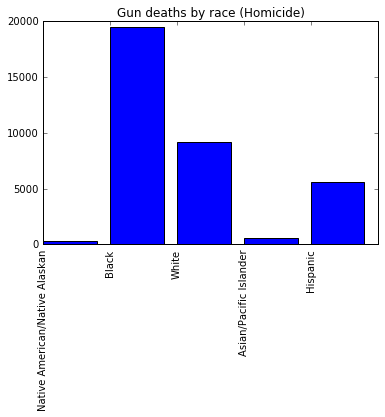

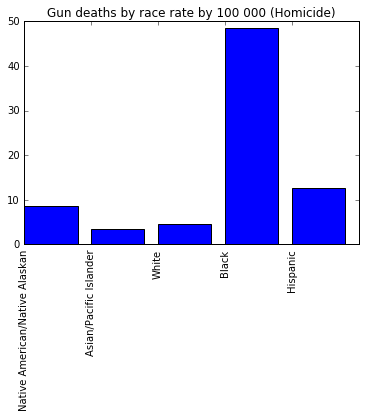

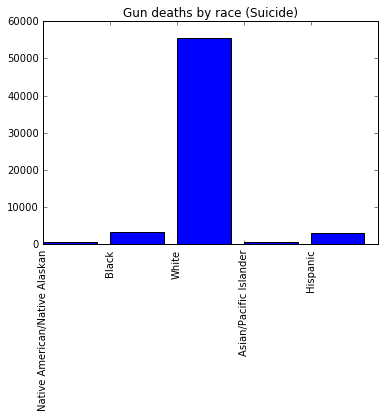

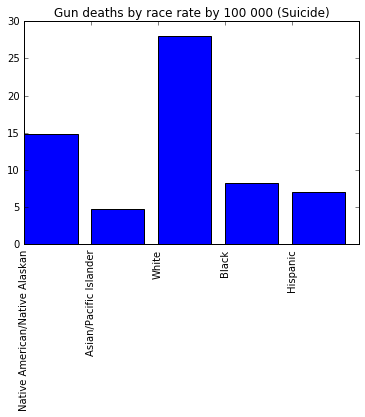

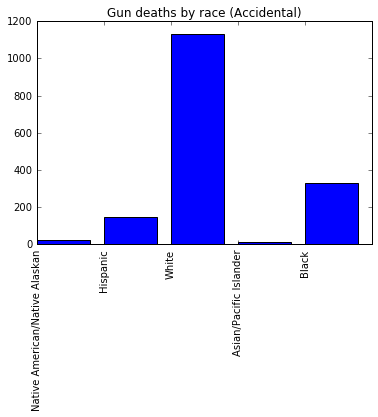

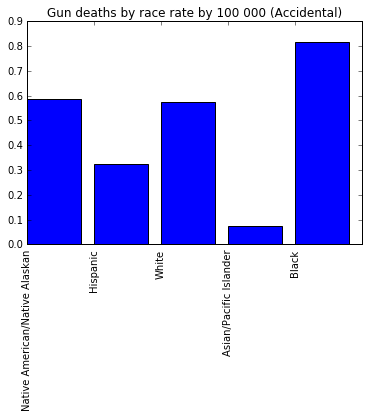

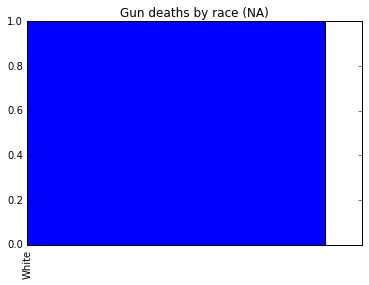

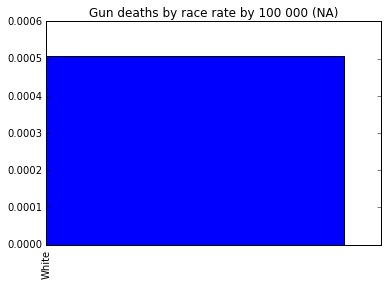

In [15]:
for death_type in set([row[3] for row in data]):
    race_counts = extract_counts([row for row in data if row[3] == death_type],
                                 lambda row: row[7])
    plot_counts(race_counts, "race (%s)" % death_type)
    
    race_rate_by_100k = {}
    for key in race_counts:
        race_rate_by_100k[key] = float(race_counts[key]) / race_percentage[key] * 100000
    
    plot_counts(race_rate_by_100k, "race rate by 100 000 (%s)" % death_type)